In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import dates
import pandas_datareader.data as web
from scipy.stats import linregress

In [2]:
s_p=pd.read_csv("S&P500.csv",index_col=["Date"],parse_dates=True)

aapl=pd.read_csv("..AAPL.csv",index_col=["Date"],parse_dates=True)

amzn=pd.read_csv("..AMZN.csv",index_col=["Date"],parse_dates=True)

goog=pd.read_csv("..GOOG.csv",index_col=["Date"],parse_dates=True)

aal=pd.read_csv("..AAL.csv",index_col=["Date"],parse_dates=True)

alk=pd.read_csv("..\\ALK.csv",index_col=["Date"],parse_dates=True)

ha=pd.read_csv("..\\HA.csv",index_col=["Date"],parse_dates=True)

cs=pd.read_csv("..\\CS.csv",index_col=["Date"],parse_dates=True)

db=pd.read_csv("..\\DB.csv",index_col=["Date"],parse_dates=True)

gs=pd.read_csv("..\\GS.csv",index_col=["Date"],parse_dates=True)

bhc=pd.read_csv("..\\BHC.csv",index_col=["Date"],parse_dates=True)

jnj=pd.read_csv("..\\JNJ.csv",index_col=["Date"],parse_dates=True)

mrk=pd.read_csv("..\\MRK.csv",index_col=["Date"],parse_dates=True)

In [3]:
# These three shares are from 2010-01-04 so take these on same scale
cs=cs["2010-1-10":]

db=db["2010-1-10":]

gs=gs["2010-1-10":]

In [4]:
# Droping the null values from all dataframes
amzn.dropna(inplace=True)

goog.dropna(inplace=True)

alk.dropna(inplace=True)

ha.dropna(inplace=True)

cs.dropna(inplace=True)

db.dropna(inplace=True)

gs.dropna(inplace=True)

bhc.dropna(inplace=True)

jnj.dropna(inplace=True)

mrk.dropna(inplace=True)

In [5]:
# Making a new data frame which contains Adjacent Close price of all stocks. 
stock_adj=pd.concat([aapl["Adj Close"],amzn["Adj Close"],goog["Adj Close"],aal["Adj Close"],alk["Adj Close"],ha["Adj Close"],cs["Adj Close"],db["Adj Close"],gs["Adj Close"],bhc["Adj Close"],jnj["Adj Close"],mrk["Adj Close"],s_p["Adj Close"]],axis=1)
stock_adj.columns=["aapl","amzn","goog","aal","alk","ha","cs","db","gs","bhc","jnj","mrk","s_p"]
stock_adj

,aapl,amzn,goog,aal,alk,ha,cs,db,gs,bhc,jnj,mrk,s_p
Date,,,,,,,,,,,,,
2010-01-10,8.719163,153.710007,261.828613,8.758067,10.972344,5.742526,30.167257,44.981487,127.147858,24.757708,45.970119,26.052284,1146.239990
2010-04-10,8.599421,155.389999,260.199707,8.597802,10.703489,5.540189,29.943998,44.263348,126.175117,24.873083,45.910553,25.995331,1137.030029
2010-05-10,8.917298,160.869995,268.110046,8.701504,10.767396,5.636539,30.830046,46.140301,128.757706,25.286512,46.751797,26.351234,1160.750000
2010-06-10,8.925013,155.399994,266.177307,8.701504,10.743157,5.752162,31.032362,46.703384,129.850906,25.661484,47.057022,26.344130,1159.969971
2010-07-10,8.925941,156.270004,264.015411,8.710930,10.247319,5.925593,31.199810,46.213741,130.083435,25.574951,47.064480,26.130579,1158.060059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,108.220001,3019.790039,1428.290039,11.770000,35.700001,12.400000,9.620000,8.110000,195.110001,15.220000,144.669998,83.150002,3246.590088
2020-09-25,112.279999,3095.129883,1444.959961,12.290000,36.700001,12.800000,9.480000,8.000000,194.949997,15.300000,145.660004,82.930000,3298.459961
2020-09-28,114.959999,3174.050049,1464.520020,12.760000,37.540001,13.380000,9.900000,8.430000,199.070007,15.270000,147.110001,82.760002,3351.600098


In [6]:
# Making a new data frame which contains Percentage dailly return of all stocks. 
stock_return=stock_adj.pct_change(1).dropna()
stock_return

,aapl,amzn,goog,aal,alk,ha,cs,db,gs,bhc,jnj,mrk,s_p
Date,,,,,,,,,,,,,
2010-04-10,-0.013733,0.010930,-0.006221,-0.018299,-0.024503,-0.035235,-0.007401,-0.015965,-0.007650,0.004660,-0.001296,-0.002186,-0.008035
2010-05-10,0.036965,0.035266,0.030401,0.012061,0.005971,0.017391,0.029590,0.042404,0.020468,0.016622,0.018324,0.013691,0.020861
2010-06-10,0.000865,-0.034003,-0.007209,0.000000,-0.002251,0.020513,0.006562,0.012204,0.008490,0.014829,0.006529,-0.000270,-0.000672
2010-07-10,0.000104,0.005599,-0.008122,0.001083,-0.046154,0.030151,0.005396,-0.010484,0.001791,-0.003372,0.000158,-0.008106,-0.001647
2010-08-10,0.016769,-0.004607,0.011962,-0.018398,0.036344,0.000000,-0.015653,-0.003002,0.010257,0.009023,0.000158,0.005448,0.006122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,0.010269,0.006644,0.009242,-0.013412,-0.031470,-0.032006,-0.006198,0.007453,0.048302,-0.033037,0.001592,0.006293,0.002987
2020-09-25,0.037516,0.024949,0.011671,0.044180,0.028011,0.032258,-0.014553,-0.013564,-0.000820,0.005256,0.006843,-0.002646,0.015977
2020-09-28,0.023869,0.025498,0.013537,0.038242,0.022888,0.045313,0.044304,0.053750,0.021134,-0.001961,0.009955,-0.002050,0.016111


## Visualized Percentage Cummulative Returns Over Time if investor bought the share on 1st Oct,2010

In [7]:
def daily_percentage_cum_return(data):
    x = 100* (data-data.iloc[0]) / data.iloc[0]
    return x

daily_percentage_cum_return=daily_percentage_cum_return(stock_adj)
daily_percentage_cum_return

,aapl,amzn,goog,aal,alk,ha,cs,db,gs,bhc,jnj,mrk,s_p
Date,,,,,,,,,,,,,
2010-01-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-04-10,-1.373320,1.092962,-0.622127,-1.829913,-2.450297,-3.523484,-0.740071,-1.596521,-0.765047,0.466016,-0.129575,-0.218610,-0.803493
2010-05-10,2.272408,4.658114,2.399063,-0.645839,-1.867860,-1.845651,2.197048,2.576202,1.266123,2.135917,1.700405,1.147500,1.265879
2010-06-10,2.360892,1.099465,1.660893,-0.645839,-2.088770,0.167801,2.867695,3.828013,2.125909,3.650483,2.364368,1.120232,1.197828
2010-07-10,2.371535,1.665472,0.835202,-0.538212,-6.607749,3.187918,3.422761,2.739469,2.308790,3.300964,2.380592,0.300530,1.031204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,1141.174193,1864.602109,445.505712,34.390385,225.363487,115.932849,-68.111121,-81.970360,53.451269,-38.524196,214.704424,219.165882,183.238250
2020-09-25,1187.738273,1913.616383,451.872442,40.327769,234.477309,122.898425,-68.575201,-82.214905,53.325428,-38.201064,216.858009,218.321419,187.763469
2020-09-28,1218.475168,1964.959927,459.343000,45.694250,242.132921,132.998510,-67.182963,-81.258957,56.565757,-38.322239,220.012226,217.668892,192.399509


## Comparative Analysis

<AxesSubplot:xlabel='Date'>

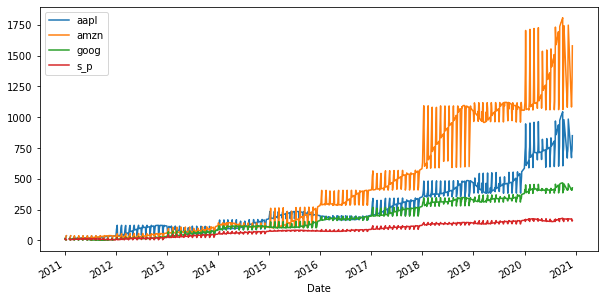

In [8]:
daily_percentage_cum_return[["aapl","amzn","goog","s_p"]].rolling(100).mean().plot(figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

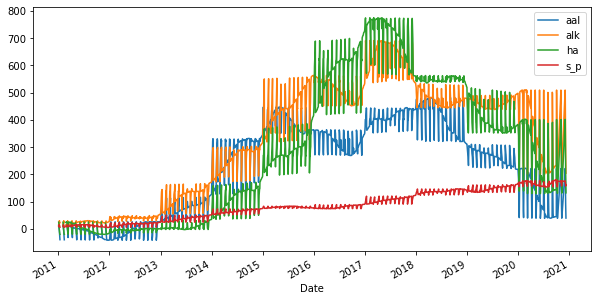

In [60]:
daily_percentage_cum_return[["aal","alk","ha","s_p"]].rolling(100).mean().plot(figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

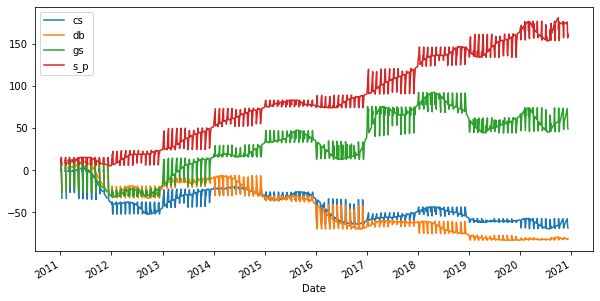

In [58]:
daily_percentage_cum_return[["cs","db","gs","s_p"]].rolling(100).mean().plot(figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

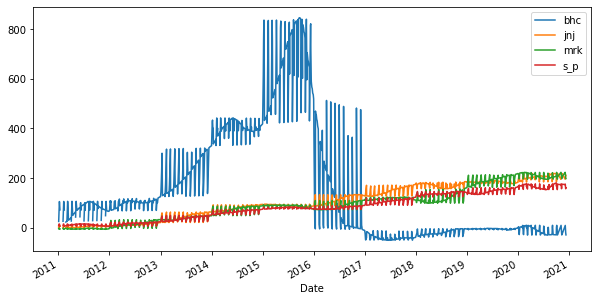

In [11]:
daily_percentage_cum_return[["bhc","jnj","mrk","s_p"]].rolling(100).mean().plot(figsize=(10, 5))

Here JNJ and MRK are going with accordingly market.

## Correlation between the stocks 

<AxesSubplot:>

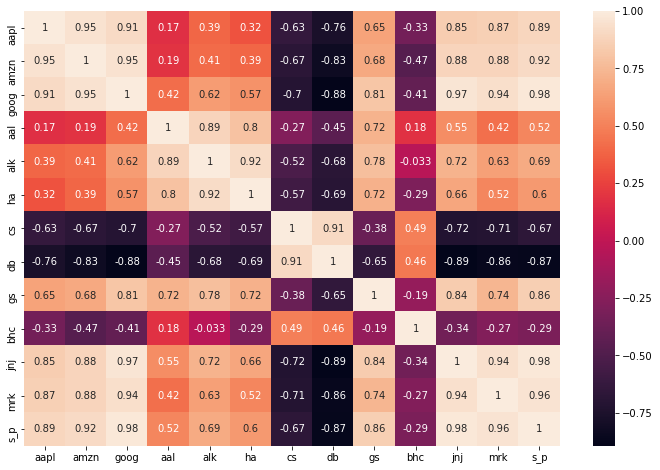

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(daily_percentage_cum_return.corr(),cmap="rocket",annot=True)

### Here we can see the relationship of the stocks with SP500. as market goes up AAPL,AMZN,GOOG,JNJ,MRK,GS also goes up but it's not in case of CS,DB,BHC. CS,DB,BHC has the poorest performance even in the graph too.

#

# Sharpe Ratio

In [13]:
def compute_sharpe_ratio(data, risk_free_rate = 0):
    mean_return = data.mean()
    std = data.std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return (252**0.5)*sharpe_ratio

sharpe_ratio=compute_sharpe_ratio(stock_return)
sharpe_ratio

aapl    1.062904
amzn    1.115496
goog    0.796808
aal     0.320281
alk     0.511767
ha      0.410696
cs     -0.138401
db     -0.192968
gs      0.303177
bhc     0.213384
jnj     0.771962
mrk     0.664869
s_p     0.708434
dtype: float64

### There is high risk associated with cs,db,bhc,aal,gs as their sharpe ratio is very low.

#

## Sortino Ratio
In contrast to the sharpe ratio, the sortino ratio only punishes returns falling below a user defined threshold. Additionally, instead of inspecting the complete standard deviation, the sortino ratio only computes the *downside risk*, i.e the standard deviation of all returns which are smaller than the target

The flow is similar to the sharpe ratio:

1. Compute mean daily return
2. Calculate downside values by taking all daily returns smaller than the target
3. Compute standard deviation of downside
4. compute daily sortino ratio with the same formula as abo

In [14]:
def compute_sortino_ratio(data, target, risk_free_rate=0):
    mean_return = data.mean()
    downside = data[data < target]
    std = downside.std()
    sortino_ratio = (mean_return-risk_free_rate) / std
    # Annual sortino ratio
    return (252**0.5)*sortino_ratio

sortino_ratio=compute_sortino_ratio(stock_return,target=0) 
sortino_ratio

aapl    1.433818
amzn    1.599350
goog    1.107973
aal     0.470583
alk     0.660551
ha      0.552202
cs     -0.182137
db     -0.282495
gs      0.408543
bhc     0.261290
jnj     0.991364
mrk     0.939149
s_p     0.826650
dtype: float64

----------------

**Now the questions: How can we fairly evaluate performance of an individual stock (or custom portfolio of stocks) against the performance of the "market" (typically some benchmark, like the SP500 )?**

------


# Capital Asset Pricing Model
"The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks.

Mathematically it is defined as:
$$ ER_i = R_f + \beta_i*(ER_m-R_f)$$

* $R_f$ is the risk free rate (currently 0)
* $\beta$ is the beta of the investment, (Volatility or risk compared to the market (SP500)),
* $ER_m$ is the expected return of the market (SP500),
* $ER_i$ is the expected return of your investment

To compute $\beta$ you can fit a linear regression, where x is the market (sp500) and y is the stock of your choice (apple, amazon, google etc.). 
Additionally this linear regression returns $\alpha$ (the intercept) which can be interpreted as the excess return to the market.

We use **linregress(x, y)** from scipy.stats to compute the least squares regression


In [15]:
help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    result : ``LinregressResult`` instance
        The return value is an object with the following attributes:
    
        slope : float
            Slope of the regression line.
        intercept : float
            Intercept of the regression line.
        rvalue : float
            Correlati

In [16]:
for name in stock_return.columns:
    beta,alpha,correlation,pvalue,_=linregress(stock_return['s_p'],stock_return[name])
    print(f"\nbeta of {name}: {beta}, Alpha: {alpha}")


beta of aapl: 1.0631109639542626, Alpha: 0.0006667404616713882

beta of amzn: 0.9988023228754594, Alpha: 0.000910248140882437

beta of goog: 1.013338030364795, Alpha: 0.0003230844819452149

beta of aal: 1.3533142404895102, Alpha: -1.5240532145772024e-07

beta of alk: 1.231967180133309, Alpha: 0.00015861996257870482

beta of ha: 1.2339234945302622, Alpha: 0.00017783400614097876

beta of cs: 1.372707486914682, Alpha: -0.0008628114922341907

beta of db: 1.5358284057942553, Alpha: -0.0010696059044174072

beta of gs: 1.3014750922790883, Alpha: -0.0002850741492012717

beta of bhc: 1.3164829257422352, Alpha: -0.00016247808558488073

beta of jnj: 0.6639551941559879, Alpha: 0.00020172696172239345

beta of mrk: 0.7366361488197515, Alpha: 0.0001854673428991626

beta of s_p: 1.0, Alpha: 0.0


#

# If an investor did long term investment(10 Years) than his percentage profit earned in these 10 years.

In [18]:
def compute_percentage_profit(data):
    initial_price = data.iloc[0]
    last_price = data.iloc[-1]
    # Returns percentage change
    return 100*(last_price-initial_price) / initial_price   #last_price/initial_price

percentage_profit=compute_percentage_profit(stock_adj)
percentage_profit

aapl    1228.223799
amzn    1948.487305
goog     461.283184
aal       40.327769
alk      233.839342
ha       124.465679
cs       -66.950923
db       -81.325651
gs        58.060076
bhc      -37.231669
jnj      223.862562
mrk      218.398176
s_p      193.394056
dtype: float64

###  There is the loss in the shares CS,DB and BHC.

#

### Now if we want to calculate How much weightage should be of all the stocks if an investor want to invest money in given stocks.

### log return as per next day

In [19]:
log_rets = np.log(stock_adj.drop("s_p",axis=1)/stock_adj.drop("s_p",axis=1).shift(1))

In [20]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

Now we just need two functions, one that gives the returns for a specific weighting and another that reports back the volatility for a specific weighting.

#### Portfolio Returns Function

In [21]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252 #Annualized Returns

#### Portfolio Volatility (Variance) Function

Note how we are now calculating the variance for an entire portfolio, not just a single stock's standard deviation or variance. We can calculate this with the Expected Portfolio Variance Equation using covariance: 

In [22]:
log_rets_cov = log_rets.cov()

In [23]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [24]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(16000):
    weights = gen_weights(N=12)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [25]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

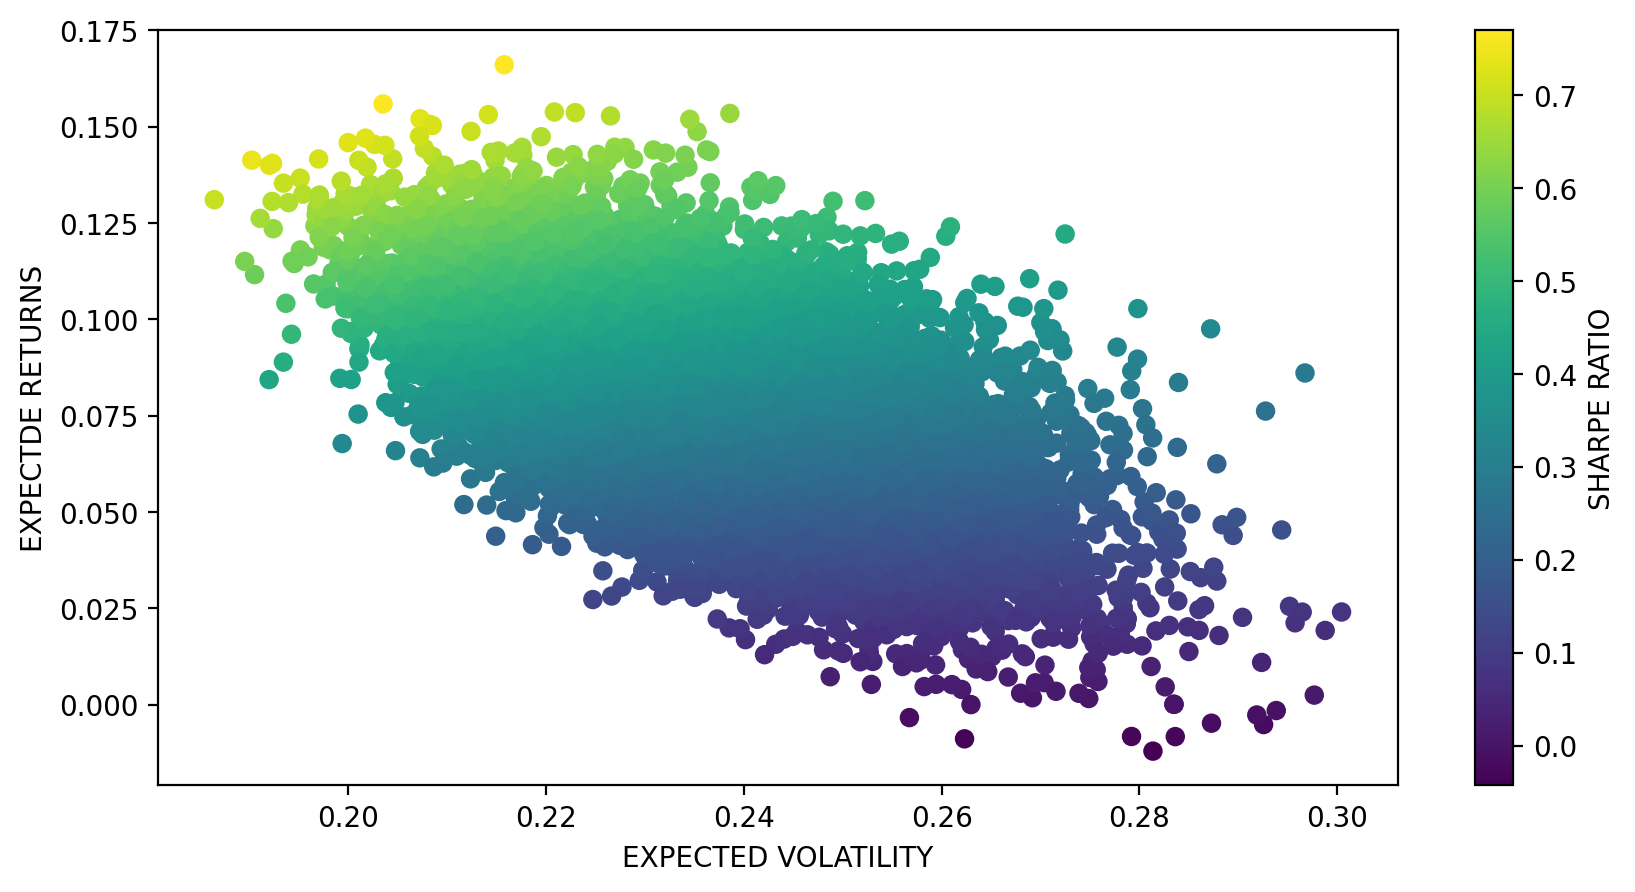

In [26]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTDE RETURNS')
plt.xlabel('EXPECTED VOLATILITY')
plt.colorbar(label="SHARPE RATIO");

In [27]:
np.argmax(mc_sharpe_ratios)

12515

In [28]:
mc_weights[np.argmax(mc_sharpe_ratios)]

array([1.86040378e-01, 1.91097564e-01, 1.83088426e-01, 1.35936994e-01,
       1.86688372e-02, 6.25236627e-02, 2.35892074e-02, 1.54740458e-03,
       5.10543163e-02, 1.21706196e-04, 6.40008977e-02, 8.23306049e-02])

In [29]:
stock_adj.drop("s_p",axis=1).columns

Index(['aapl', 'amzn', 'goog', 'aal', 'alk', 'ha', 'cs', 'db', 'gs', 'bhc',
       'jnj', 'mrk'],
      dtype='object')

In [30]:
mc_weight_df=pd.DataFrame(data=mc_weights[np.argmax(mc_sharpe_ratios)],index=stock_adj.drop("s_p",axis=1).columns,columns=["mc_weights"])
mc_weight_df

,mc_weights
aapl,0.186040
amzn,0.191098
goog,0.183088
aal,0.135937
alk,0.018669
ha,0.062524
cs,0.023589
db,0.001547
gs,0.051054
bhc,0.000122


<AxesSubplot:>

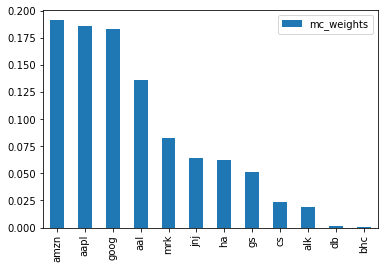

In [52]:
mc_weight_df.sort_values(by="mc_weights",ascending=False).plot.bar()

In [31]:
mean_std=stock_return.describe().T.loc[:,["mean","std"]]
mean_std

,mean,std
aapl,0.001185,0.017705
amzn,0.001398,0.019889
goog,0.000818,0.016288
aal,0.000660,0.032723
alk,0.000760,0.023567
ha,0.000780,0.030147
cs,-0.000193,0.022135
db,-0.000320,0.026340
gs,0.000350,0.018326
bhc,0.000480,0.035703


In [32]:
mean_std["mean"]=mean_std["mean"]*252
mean_std["std"]=mean_std["std"]*np.sqrt(252)

In [33]:
mean_std

,mean,std
aapl,0.298745,0.281065
amzn,0.352201,0.315735
goog,0.206023,0.258561
aal,0.166373,0.519460
alk,0.191462,0.374120
ha,0.196545,0.478565
cs,-0.048632,0.351386
db,-0.080686,0.418133
gs,0.088198,0.290914
bhc,0.120938,0.566763


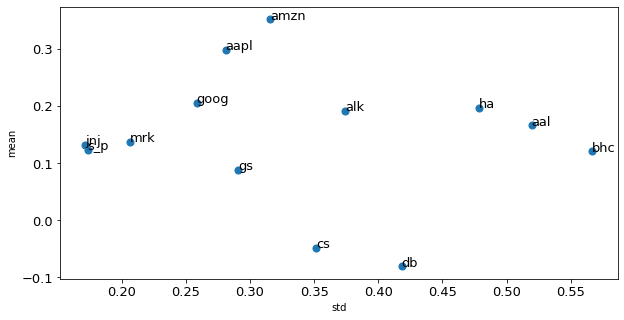

In [34]:
mean_std.plot.scatter(x="std",y="mean",s=50,fontsize=13,figsize=(10,5))
for i in mean_std.index:
    plt.annotate(i,xy=(mean_std.loc[i,"std"], mean_std.loc[i,"mean"]),size=13)

### Summary

In [54]:
summary=pd.read_csv("..\\New Microsoft Excel Worksheet.csv")

In [55]:
summary

,SUMMARY,APPLE,AMAZON,GOOGLE,AAL,ALK,HA,CS,DB,GS,BHC,JNJ,MRK,S&P500
0,Percentage Return If share is purchased on 1st...,1228%,1948%,46%,40%,233%,124%,-66%,-81%,58%,-37%,223%,218%,193%
1,Beta Value,1.06,0.998,1.01,1.35,1.231,1.233,1.37,1.53,1.3,1.31,0.66,0.73,1
2,Alpha,0.00066,0.00091,0.000323,-1.524,0.00015,0.000177,-0.000862,-0.001069,-0.000285,-0.0001624,0.000201,0.000185,0
3,Sharpe Ratio,1.06,1.115,0.796,0.32,0.511,0.416,-0.13,-0.19,0.303,0.213,0.771,0.664,0.708
4,Sortino Ratio,1.43,1.59,1.1,0.47,0.66,0.55,-0.18,-0.28,0.4,0.26,0.99,0.93,0.82
5,Corelation with S&P500,0.89,0.92,0.98,0.52,0.69,0.6,-0.67,-0.87,0.86,-0.29,0.98,0.96,1
6,Mean of percentage change (Return),0.2987,0.35,0.206,0.166,0.191,0.196,-0.048,-0.081,0.088,0.12,0.132,0.137,0.122
7,Standard Deviation of percentage change (Risk),0.28,0.315,0.258,0.519,0.374,0.478,0.351,0.418,0.29,0.566,0.171,0.206,0.173


1.According to the graph and analysis we can conclude investing in stocks like CS,DB and BHC is giving high risk.
<br>
2.Apple,Amazon,Google ,JNJ and MRK are safe shares to invest.
<br>
3.CS and DB are giving negative Alpha and high Beta which is the big risk.